<a href="https://colab.research.google.com/github/jackiekuen2/cs20/blob/master/Lecture_3_Linear_Regression2017_Fire_and_Theft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3 - Linear Regression - Fire and Theft

In [0]:
!wget --no-check-certificate https://github.com/chiphuyen/stanford-tensorflow-tutorials/raw/master/2017/data/fire_theft.xls -O /tmp/fire_theft.xls

--2019-09-25 15:10:28--  https://github.com/chiphuyen/stanford-tensorflow-tutorials/raw/master/2017/data/fire_theft.xls
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/2017/data/fire_theft.xls [following]
--2019-09-25 15:10:28--  https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/2017/data/fire_theft.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1704 (1.7K) [application/octet-stream]
Saving to: ‘/tmp/fire_theft.xls’

/tmp/fire_theft.xls 100%[===================>]   1.66K  --.-KB/s    in 0s      

2019-09-25 15:10:28 (2

In [0]:
!wget https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/2017/examples/utils.py

--2019-09-25 15:10:33--  https://raw.githubusercontent.com/chiphuyen/stanford-tensorflow-tutorials/master/2017/examples/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462 [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]     462  --.-KB/s    in 0s      

2019-09-25 15:10:33 (33.4 MB/s) - ‘utils.py’ saved [462/462]



In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils

##Phase 1: Assemble the graph

In [0]:
# Step 1: Read in the data
DATA_FILE = '/tmp/fire_theft.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [0]:
n_samples

42

In [0]:
# Step 2: Create placeholders for input X (number of fire) and label Y (number of theft)
# X and Y are tensors
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [0]:
# Step 3: Create variables: weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [0]:
# Step 4: Build model to predict Y
Y_pred = X * w + b

In [0]:
# Step 5: Loss function, using squared error
loss = tf.square(Y - Y_pred, name='loss')

In [0]:
# Step 6: Optimizer, using Gradient Descent with learning rate of 0.001 to minimie the loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

##Phase 2: Train model

In [0]:
with tf.Session() as sess:
    # Step 7: Initialize the variables: w and b
    sess.run(tf.global_variables_initializer())

    # Write into TensorBoard
    writer = tf.summary.FileWriter('./my_graph/03/linear_reg', sess.graph)

    # Step 8: Train the model 100 times
    for i in range(100): # loop 100 times (100 epochs)
        total_loss = 0
        for x, y in data: # loop 42 times
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print(f"Epoch {i}: {total_loss/n_samples}")

    # Close the writer when you're doen using it
    writer.close()

    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])

Epoch 0: 2069.632077968724
Epoch 1: 2117.0124027045676
Epoch 2: 2092.302715009167
Epoch 3: 2068.508299712269
Epoch 4: 2045.59097691377
Epoch 5: 2023.51466578529
Epoch 6: 2002.2447984701112
Epoch 7: 1981.7480356388148
Epoch 8: 1961.9942731161912
Epoch 9: 1942.9520601381857
Epoch 10: 1924.5930879137345
Epoch 11: 1906.8898473151382
Epoch 12: 1889.8164801984317
Epoch 13: 1873.347572792144
Epoch 14: 1857.4589788810838
Epoch 15: 1842.1277029727187
Epoch 16: 1827.3322633700002
Epoch 17: 1813.052086790048
Epoch 18: 1799.2660774976082
Epoch 19: 1785.9562136753016
Epoch 20: 1773.1024838801738
Epoch 21: 1760.6891868668124
Epoch 22: 1748.6984040662203
Epoch 23: 1737.1138700809595
Epoch 24: 1725.9208882119883
Epoch 25: 1715.1045996287653
Epoch 26: 1704.6503852187864
Epoch 27: 1694.5447281878164
Epoch 28: 1684.774640512564
Epoch 29: 1675.3281234368194
Epoch 30: 1666.1934701423827
Epoch 31: 1657.35837137096
Epoch 32: 1648.8119148027063
Epoch 33: 1640.5438601484611
Epoch 34: 1632.5446351634428
Epoch 3

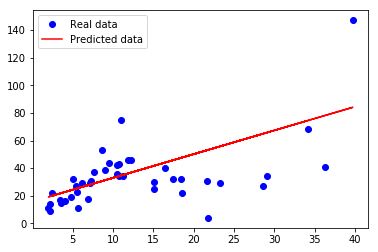

In [0]:
# Plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir='./my_graph/03/linear_reg'